In [107]:
import numpy as np
import matplotlib.pyplot as plt
import emoji
import pandas as pd
from keras.utils import to_categorical
from keras.layers import *
from keras.models import Sequential
plt.style.use('seaborn')

In [108]:
df=pd.read_csv('Emoji_dataset/train_emoji.csv',header=None)
df=df.iloc[:,:2]
x=df.values[:,0]
y=df.values[:,1]

df=pd.read_csv('Emoji_dataset/test_emoji.csv',header=None)
df=df.iloc[:,:2]
xtest=df.values[:,0]
ytest=df.values[:,1]
df.head()

,0,1
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a raise\t,2
3,she got me a present\t,0
4,ha ha ha it was so funny\t,2


In [109]:
print(x.shape,y.shape,xtest.shape,ytest.shape)

(132,) (132,) (56,) (56,)


In [110]:
# emoji.UNICODE_EMOJI - To print emoji and names

In [111]:
emoji_dictionary = {"0": ":blue_heart:",   
                    "1": ":baseball:",
                    "2": ":beaming_face_with_smiling_eyes:",
                    "3": ":downcast_face_with_sweat:",
                    "4": ":fork_and_knife:",
                   }

In [112]:
# visualise train data
for i in range(10):
    print(x[i]," "*(40-len(x[i])),emoji.emojize(emoji_dictionary[str(y[i])]))
    
y=to_categorical(y)
y_test=ytest
ytest=to_categorical(ytest)

never talk to me again                    😓
I am proud of your achievements           😁
It is the worst day in my life            😓
Miss you so much                          💙
food is life                              🍴
I love you mum                            💙
Stop saying bullshit                      😓
congratulations on your acceptance        😁
The assignment is too long                😓
I want to go play                         ⚾


In [113]:
def Get_word_embeddings():
    word_embeddings={}
    with open('glove.6B.50d.txt',encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            embeddings = np.asarray(values[1:],dtype='float32')
            word_embeddings[word] = embeddings
    return word_embeddings
embeddings_index=Get_word_embeddings()

In [114]:
# print(word_embeddings['mango'])

In [115]:
from nltk.tokenize import word_tokenize
def Get_embeddings_for_data(X):
    X_=np.zeros((X.shape[0],10,50)) 
    #each word is a 50 dim embedding and there are less than 10 words in each example
    for i in range(X.shape[0]):
        temp=np.array(word_tokenize(X[i]))
        for j in range(len(temp)):
            try:
                X_[i][j]=embeddings_index[temp[j].lower()]
            except:
                X_[i][j]=np.zeros((50,))
    return X_
x_=Get_embeddings_for_data(x)
xtest_=Get_embeddings_for_data(xtest)

In [116]:
model=Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64,input_shape=(10,50)))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 10, 64)            29440     
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
_________________________________________________________________
activation_5 (Activation)    (None, 5)                 0         
Total params: 62,789
Trainable params: 62,789
Non-trainable params: 0
__________________________________________________

In [117]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint("best_model.h5",monitor='val_loss',verbose=True,save_best_only=True)

In [118]:
hist=model.fit(x_,y,epochs=100,batch_size=64,shuffle=True,callbacks=checkpoint,validation_split=0.2)

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 1.6136 - accuracy: 0.1875
Epoch 00001: val_loss improved from inf to 1.61718, saving model to best_model.h5
2/2 [==============================] - 1s 376ms/step - loss: 1.5948 - accuracy: 0.2667 - val_loss: 1.6172 - val_accuracy: 0.2222
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 1.5554 - accuracy: 0.3750
Epoch 00002: val_loss did not improve from 1.61718
2/2 [==============================] - 0s 36ms/step - loss: 1.5497 - accuracy: 0.3619 - val_loss: 1.6274 - val_accuracy: 0.2593
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 1.5304 - accuracy: 0.3906
Epoch 00003: val_loss did not improve from 1.61718
2/2 [==============================] - 0s 30ms/step - loss: 1.5246 - accuracy: 0.3714 - val_loss: 1.6443 - val_accuracy: 0.2222
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 1.5037 - accuracy: 0.3281
Epoch 00004: val_loss did not improve from 1.61718
2/2 [===

1/2 [==============>...............] - ETA: 0s - loss: 0.5132 - accuracy: 0.7812
Epoch 00029: val_loss improved from 1.03772 to 1.03503, saving model to best_model.h5
2/2 [==============================] - 0s 43ms/step - loss: 0.4107 - accuracy: 0.8476 - val_loss: 1.0350 - val_accuracy: 0.6296
Epoch 30/100
1/2 [==============>...............] - ETA: 0s - loss: 0.3813 - accuracy: 0.9062
Epoch 00030: val_loss did not improve from 1.03503
2/2 [==============================] - 0s 23ms/step - loss: 0.3538 - accuracy: 0.9143 - val_loss: 1.1357 - val_accuracy: 0.6667
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 0.4984 - accuracy: 0.8750
Epoch 00031: val_loss did not improve from 1.03503
2/2 [==============================] - 0s 23ms/step - loss: 0.3958 - accuracy: 0.9048 - val_loss: 1.1058 - val_accuracy: 0.6667
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2909 - accuracy: 0.9375
Epoch 00032: val_loss did not improve from 1.03503
2/2 [=========

Epoch 59/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0634 - accuracy: 0.9844
Epoch 00059: val_loss did not improve from 0.99125
2/2 [==============================] - 0s 25ms/step - loss: 0.0981 - accuracy: 0.9810 - val_loss: 1.6499 - val_accuracy: 0.6296
Epoch 60/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0678 - accuracy: 1.0000
Epoch 00060: val_loss did not improve from 0.99125
2/2 [==============================] - 0s 25ms/step - loss: 0.0968 - accuracy: 0.9810 - val_loss: 1.6093 - val_accuracy: 0.6296
Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0542 - accuracy: 1.0000
Epoch 00061: val_loss did not improve from 0.99125
2/2 [==============================] - 0s 24ms/step - loss: 0.0681 - accuracy: 0.9905 - val_loss: 1.6156 - val_accuracy: 0.6667
Epoch 62/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0833 - accuracy: 0.9844
Epoch 00062: val_loss did not improve from 0.99125
2/2 [==============================]

1/2 [==============>...............] - ETA: 0s - loss: 0.0129 - accuracy: 1.0000
Epoch 00089: val_loss did not improve from 0.99125
2/2 [==============================] - 0s 24ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.8453 - val_accuracy: 0.6667
Epoch 90/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0171 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.99125
2/2 [==============================] - 0s 24ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 1.8213 - val_accuracy: 0.6667
Epoch 91/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - accuracy: 1.0000
Epoch 00091: val_loss did not improve from 0.99125
2/2 [==============================] - 0s 24ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 1.8434 - val_accuracy: 0.6667
Epoch 92/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0224 - accuracy: 1.0000
Epoch 00092: val_loss did not improve from 0.99125
2/2 [==============================] - 0s 25ms/st

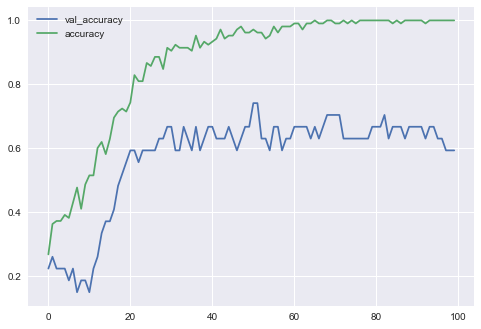

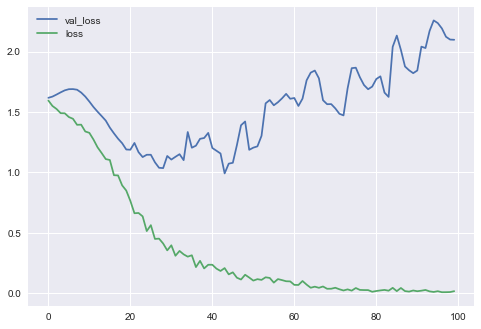

In [119]:
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.plot(hist.history['accuracy'],label='accuracy')
plt.legend()
plt.show()
plt.plot(hist.history['val_loss'],label='val_loss')
plt.plot(hist.history['loss'],label='loss')
plt.legend()
plt.show()

In [120]:
model.load_weights('best_model.h5')

In [121]:
print("Training Data ",model.evaluate(x_,y))
print("Test Data ",model.evaluate(xtest_,ytest))

5/5 [==============================] - 0s 4ms/step - loss: 0.2958 - accuracy: 0.9015
Training Data  [0.2957776188850403, 0.9015151262283325]
2/2 [==============================] - 0s 3ms/step - loss: 1.3913 - accuracy: 0.5893
Test Data  [1.3913023471832275, 0.5892857313156128]


In [122]:
pred = model.predict_classes(xtest_)
print(pred)

[4 3 2 2 2 2 3 2 4 2 1 2 0 3 1 3 2 2 3 2 0 3 4 0 3 3 2 0 4 2 0 1 0 2 2 1 2
 4 4 2 1 0 0 1 2 1 3 2 0 3 3 0 3 2 3 4]


In [123]:
print("text"," "*50,"actual  predictions\n")
for i in range(xtest.shape[0]):
    print(xtest[i][:-1]," "*(60-len(xtest[i])),end="")
    print(emoji.emojize(emoji_dictionary[str(np.argmax(y[i]))]),end="\t")
    print(emoji.emojize(emoji_dictionary[str(pred[i])]))

text                                                    actual  predictions

I want to eat                                               😓	🍴
he did not answer                                           😁	😓
he got a raise                                              😓	😁
she got me a present                                        💙	😁
ha ha ha it was so funny                                    🍴	😁
he is a good friend                                         💙	😁
I am upset                                                  😓	😓
We had such a lovely dinner tonight                         😁	😁
where is the food                                           😓	🍴
Stop making this joke ha ha ha                              ⚾	😁
where is the ball                                           😓	⚾
work is hard                                                😓	😁
This girl is messing with me                                ⚾	💙
are you serious ha ha                                       😓	😓
Let us go play baseball    

In [124]:
arr=np.zeros((pred.shape[0],))
y_test=y_test.reshape((-1,))
# print(arr.shape,pred.shape,y_test.shape)
arr[pred==y_test]=1
print("accuracy - ",round(100*np.sum(arr)/pred.shape[0]))

accuracy -  59.0
